<a href="https://colab.research.google.com/github/aymensrihi/deep-learning-projects/blob/main/simple_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
inputs=torch.tensor(
    [[0.72,0.45,0.31],#Dream
     [0.75,0.20,0.55],#big
     [0.30,0.80,0.40],#and
     [0.85,0.35,0.60],#work
     [0.55,0.15,0.75],#for
     [0.25,0.20,0.85]]#it
)
#corresponding words
words=['i','love','what','you','have','done']

In [27]:
magnitudes=torch.norm(inputs,dim=1)#picked dim=1 for magnitude along the norm
print('magnitudes of the vectors :\n')
for word,magnitude in zip(words,magnitudes):
  print(f"{word}:{magnitude.item():.4f}")

magnitudes of the vectors :

i:0.9039
love:0.9513
what:0.9434
you:1.0977
have:0.9421
done:0.9083


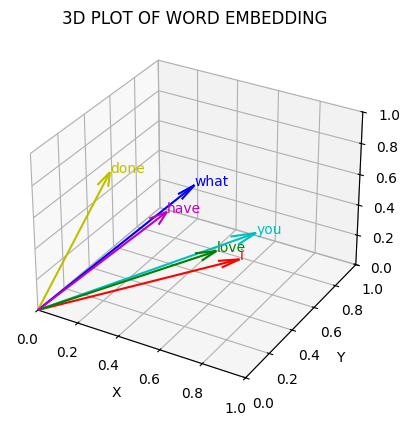

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#extract x,y,z coordinates
x_coords=inputs[:,0].numpy()
y_coords=inputs[:,1].numpy()
z_coords=inputs[:,2].numpy()
#3D plot with vectors from origin
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
colors=['r','g','b','c','m','y']
for (x,y,z,word,color) in zip(x_coords,y_coords,z_coords,words,colors):
  ax.quiver(0,0,0,x,y,z,color=color,arrow_length_ratio=0.1)
  ax.text(x,y,z,word,fontsize=10,color=color)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])
plt.title('3D PLOT OF WORD EMBEDDING')
plt.show()





In [29]:
query=inputs[1] #we chose the second input token to be the query
attn_scores_2=torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
  attn_scores_2[i]=torch.dot(x_i,query)
print(attn_scores_2)


tensor([0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6950])


In [30]:
import tensorflow as tf
#convert attn_scores_2 to tensorflow tensor
attn_scores_2_tf=tf.convert_to_tensor(attn_scores_2.numpy())
attn_weights_2_tmp=tf.nn.softmax(attn_scores_2_tf)
print("attention weights :",attn_weights_2_tmp.numpy())
print("sum :",attn_weights_2_tmp.numpy().sum())


attention weights : [0.16244562 0.18033989 0.13359906 0.20589025 0.1715446  0.14618066]
sum : 1.0000001


In [31]:
attn_scores=inputs @ inputs.T
print(attn_scores)

tensor([[0.8170, 0.8005, 0.7000, 0.9555, 0.6960, 0.5335],
        [0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6950],
        [0.7000, 0.6050, 0.8900, 0.7750, 0.5850, 0.5750],
        [0.9555, 1.0375, 0.7750, 1.2050, 0.9700, 0.7925],
        [0.6960, 0.8550, 0.5850, 0.9700, 0.8875, 0.8050],
        [0.5335, 0.6950, 0.5750, 0.7925, 0.8050, 0.8250]])


In [32]:
attn_weights=torch.softmax(attn_scores,dim=-1)
print(attn_weights)

tensor([[0.1766, 0.1738, 0.1571, 0.2029, 0.1565, 0.1330],
        [0.1624, 0.1803, 0.1336, 0.2059, 0.1715, 0.1462],
        [0.1675, 0.1523, 0.2025, 0.1805, 0.1493, 0.1478],
        [0.1648, 0.1789, 0.1376, 0.2115, 0.1672, 0.1400],
        [0.1491, 0.1747, 0.1334, 0.1960, 0.1805, 0.1662],
        [0.1396, 0.1641, 0.1455, 0.1809, 0.1831, 0.1868]])


In [33]:
all_context_vecs=attn_weights @ inputs
print(all_context_vecs)

tensor([[0.5965, 0.3611, 0.5654],
        [0.5982, 0.3431, 0.5794],
        [0.5681, 0.3830, 0.5627],
        [0.6008, 0.3471, 0.5758],
        [0.5859, 0.3377, 0.5900],
        [0.5684, 0.3402, 0.5964]])


In [34]:
context_vec_2=all_context_vecs[1]
print("Previous 2nd context vector :",context_vec_2)

Previous 2nd context vector : tensor([0.5982, 0.3431, 0.5794])


In [35]:
inputs=torch.cat((inputs,context_vec_2.unsqueeze(0)),dim=0)
words.append('context_vector of love')
print(inputs)


tensor([[0.7200, 0.4500, 0.3100],
        [0.7500, 0.2000, 0.5500],
        [0.3000, 0.8000, 0.4000],
        [0.8500, 0.3500, 0.6000],
        [0.5500, 0.1500, 0.7500],
        [0.2500, 0.2000, 0.8500],
        [0.5982, 0.3431, 0.5794]])


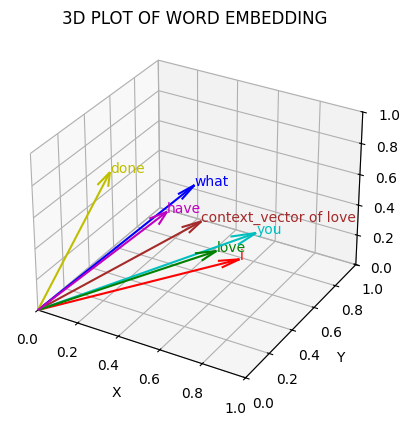

In [36]:
#extract x,y,z coordinates
x_coords=inputs[:,0].numpy()
y_coords=inputs[:,1].numpy()
z_coords=inputs[:,2].numpy()
#3D plot with vectors from origin
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
colors=['r','g','b','c','m','y','brown']
for (x,y,z,word,color) in zip(x_coords,y_coords,z_coords,words,colors):
  ax.quiver(0,0,0,x,y,z,color=color,arrow_length_ratio=0.1)
  ax.text(x,y,z,word,fontsize=10,color=color)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])
plt.title('3D PLOT OF WORD EMBEDDING')
plt.show()
